# Video Games: A story

The datset is a collection of video games, sales, publishers between the the year 1980 - 2020, the dataset was sourced from kaggle, and here i put my skills to the test by carrying out a deep analysis on the dataset, finding and connecting patterns, searching out trends and interesting facts about the dataset, the tools employed are python's pandas for analyzing the data in tables, numpy, matplotlib and seaborn for data visualization. All these and more i learnt from the course [Data Analysis with Python: Zero to Pandas](zerotopandas.com)

## Downloading the Dataset

The dataset was downloaded in csv format from kaggle using the opendatasets module.

In [6]:
!pip install jovian opendatasets --upgrade --quiet

You should consider upgrading via the '/data/user/0/ru.iiec.pydroid3/files/arm-linux-androideabi/bin/python3.9 -m pip install --upgrade pip' command.


Let's begin by downloading the data, and listing the files within the dataset.

In [2]:
dataset_url = 'https://www.kaggle.com/vgsales-copy.csv' 

In [16]:
import opendatasets as od
od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: joshuaiwuoha
Your Kaggle Key: ········


100%|█████████████████████| 381k/381k [00:00<00:00, 502kB/s]


The dataset has been downloaded and extracted.

In [2]:
datadf = './videogamesales/vgsales.csv'

In [3]:
import os 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline 

Let us save and upload our work to Jovian before continuing.

In [1]:
project_name = "videogames_a_story"

In [ ]:
!pip install jovian --upgrade -q

In [2]:
import jovian

In [ ]:
jovian.commit(project=project_name)

<IPython.core.display.Javascript object>

[jovian] Please enter your API key ( from https://jovian.ai/ ):
API KEY: ········


[jovian] Error: The current API key is invalid or expired.


[jovian] Please enter your API key ( from https://jovian.ai/ ):
API KEY: ········
[jovian] Creating a new project "joshuaiwuoha611/videogames_a_story"


## Data Preparation and Cleaning

Here the dataset is loaded into a dataframe using pandas, number of rows & columns are explored and also missing and incorrect data are handled.


In [4]:
datadf = pd.read_csv(datadf )

In [4]:
datadf

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [5]:
datadf.shape

(16598, 11)

There are 16598 rows to explore and 11 attributes(columns)

In [6]:
datadf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.1+ MB


We can see that the datatype for each attribute corresponds and we have a few missing values in the publisher and year(year the game was launched) columns 

Apprently, while performing some analysis, i discovered that there were some 'Unknown' values in the Publisher column.

In [7]:
datadf[datadf.Publisher == 'Unknown']

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
940,942,Gran Turismo Concept 2001 Tokyo,PS2,2001.0,Racing,Unknown,0.00,1.10,0.42,0.33,1.84
1649,1651,NASCAR Thunder 2003,PS2,NaN,Racing,Unknown,0.60,0.46,0.00,0.16,1.22
2114,2116,Suikoden III,PS2,NaN,Role-Playing,Unknown,0.29,0.23,0.38,0.08,0.98
2173,2175,Wheel of Fortune,PS2,NaN,Misc,Unknown,0.47,0.36,0.00,0.12,0.95
2236,2238,Teenage Mutant Ninja Turtles,GBA,2003.0,Action,Unknown,0.67,0.25,0.00,0.02,0.93
...,...,...,...,...,...,...,...,...,...,...,...
16460,16463,"Horse Life 4: My Horse, My Friend, My Champion",3DS,2015.0,Action,Unknown,0.00,0.01,0.00,0.00,0.01
16493,16496,The Smurfs,3DS,NaN,Action,Unknown,0.00,0.01,0.00,0.00,0.01
16532,16535,STORM: Frontline Nation,PC,2011.0,Strategy,Unknown,0.00,0.01,0.00,0.00,0.01
16545,16548,The Treasures of Mystery Island 3 Pack - Save ...,PC,2011.0,Puzzle,Unknown,0.01,0.00,0.00,0.00,0.01


In [5]:
datadf.Publisher.replace('Unknown',np.nan,inplace= True)

All 'Unknown' values have been replaced with nan. 

In [6]:
datadf.dropna(thresh = 10 , axis = 0, inplace= True)

With the above code, all rows with nan values for both the year and publisher are removed from the dataset.

In [7]:
datadf.reset_index(inplace = True)

To restore correct index numbering after removing nan values.

In [8]:
datadf['Rank'] = np.arange(1,datadf.shape[0]+1)

In [9]:
del datadf['index']

Recalculated the rank as well as deleted the previous index

In [10]:
datadf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16473 entries, 0 to 16472
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16473 non-null  int32  
 1   Name          16473 non-null  object 
 2   Platform      16473 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16473 non-null  object 
 5   Publisher     16337 non-null  object 
 6   NA_Sales      16473 non-null  float64
 7   EU_Sales      16473 non-null  float64
 8   JP_Sales      16473 non-null  float64
 9   Other_Sales   16473 non-null  float64
 10  Global_Sales  16473 non-null  float64
dtypes: float64(6), int32(1), object(4)
memory usage: 1.1+ MB


In [14]:
datadf.columns

Index(['Rank', 'Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'],
      dtype='object')

* Rank - Ranking of overall sales
* Name - The games name
* Platform - Platform of the games release (i.e. PC,PS4, etc.)
* Year - Year of the game's release
* Genre - Genre of the game
* Publisher - Publisher of the game
NA_Sales - Sales in North America (in millions)
* EU_Sales - Sales in Europe (in millions)
* JP_Sales - Sales in Japan (in millions)
* Other_Sales - Sales in the rest of the world (in millions)
* Global_Sales - Total worldwide sales.

In [15]:
datadf.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16473.000000,16327.000000,16473.000000,16473.000000,16473.000000,16473.000000,16473.000000
mean,8237.000000,2006.406443,0.265724,0.147397,0.078151,0.048303,0.539849
std,4755.489828,5.828981,0.819485,0.507072,0.310320,0.189245,1.560352
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4119.000000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8237.000000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12355.000000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.480000
max,16473.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


Apparently, the games in the dataset were released between 1980 - 2020. We have cases where a single unit of a game wasn't sold in a particular region, but units of it were sold anyway, as the minimum values Global_Sales is greater than zero.

In [ ]:
jovian.commit()

## Exploratory Analysis and Visualization

A deeper exploration of the dataset.



Let's begin by importing`matplotlib.pyplot` and `seaborn`.

In [16]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 11
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

## Platform

In [17]:
datadf

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16468,16469,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16469,16470,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16470,16471,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16471,16472,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [18]:
datadf.Platform.nunique()

31

There are 31 distinct platforms on which the games in the dataset are launched.

###### lets see how the platform with the most games.

In [19]:
platf = datadf.Platform.value_counts(ascending = False).reset_index().rename( columns = {'index':'Platform','Platform':'Games'})

In [20]:
platf

,Platform,Games
0,DS,2147
1,PS2,2138
2,PS3,1321
3,Wii,1310
4,X360,1254
5,PSP,1205
6,PS,1191
7,PC,956
8,GBA,816
9,XB,812


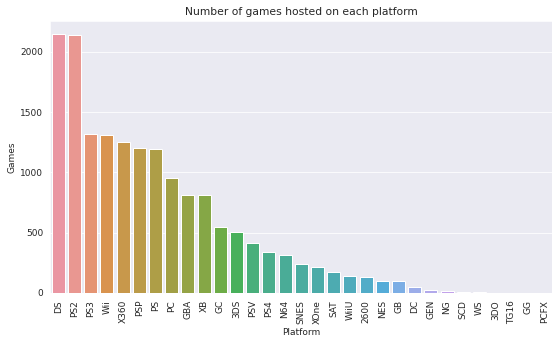

In [21]:
plt.rcParams['font.size'] = 9
plt.title('Number of games hosted on each platform')
plt.xticks(rotation = 90)
sns.barplot(x = platf.Platform , y = platf.Games);

Clearly seen from the barchart is the fact that the DS and PS2 are the platforms with the most games released on. 

In [22]:
sales = datadf.groupby('Platform')['Global_Sales'].sum().sort_values(ascending = False  ).reset_index()
sales 

,Platform,Global_Sales
0,PS2,1244.96
1,X360,978.75
2,PS3,956.46
3,Wii,923.37
4,DS,821.26
5,PS,728.59
6,GBA,316.88
7,PSP,294.83
8,PS4,278.10
9,PC,258.24


In [23]:
plat_sal = platf.merge(sales)
plat_sal

,Platform,Games,Global_Sales
0,DS,2147,821.26
1,PS2,2138,1244.96
2,PS3,1321,956.46
3,Wii,1310,923.37
4,X360,1254,978.75
5,PSP,1205,294.83
6,PS,1191,728.59
7,PC,956,258.24
8,GBA,816,316.88
9,XB,812,255.99


No handles with labels found to put in legend.


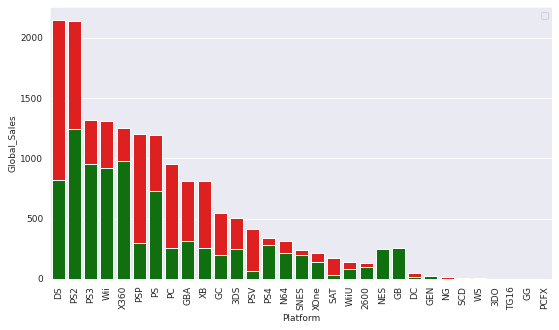

In [24]:
sns.barplot(x= plat_sal.Platform , y = plat_sal.Games  , data = plat_sal,color = 'r')
sns.barplot(x = plat_sal.Platform, y = plat_sal.Global_Sales, data = plat_sal,color = 'g' )
plt.xticks(rotation = 90)
plt.legend(loc = 'best');

## GENRE

In [25]:
datadf.Genre.nunique()

12

There are 12 distinct genres in our dataset.

In [26]:
cont = datadf.Genre.value_counts().reset_index().rename(columns = {'index':'Genre','Genre':'Count'})
cont

,Genre,Count
0,Action,3300
1,Sports,2324
2,Misc,1720
3,Role-Playing,1478
4,Shooter,1298
5,Adventure,1280
6,Racing,1239
7,Platform,880
8,Simulation,858
9,Fighting,841


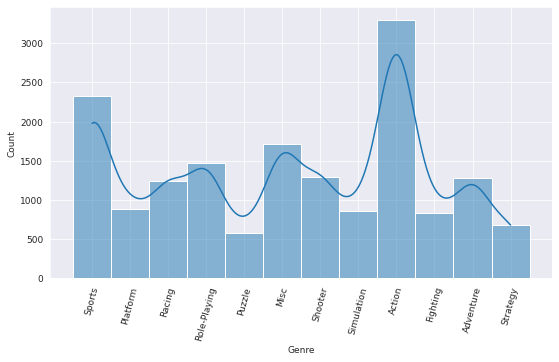

In [27]:
plt.xticks(rotation = 75)
sns.histplot(datadf.Genre, kde = True);

Quite a number of the games are of the Action genre (more than 3000). The closest to the action genre is sports. As i proceed I'll try to see if there is a positive correlation between the genre and units sold.

In [28]:
gen_df = datadf.groupby('Genre').sum()['Global_Sales'].sort_values(ascending = False)
gen_df = gen_df.reset_index()
gen_df

,Genre,Global_Sales
0,Action,1748.97
1,Sports,1323.89
2,Shooter,1035.90
3,Role-Playing,925.31
4,Platform,830.63
5,Misc,805.45
6,Racing,729.48
7,Fighting,445.45
8,Simulation,390.79
9,Puzzle,243.44


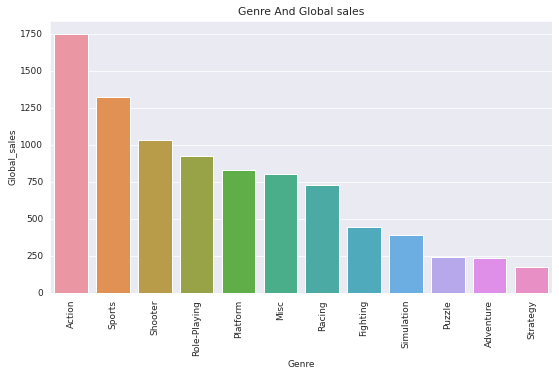

In [29]:
sns.barplot(x = gen_df.Genre, y = gen_df.Global_Sales) 
plt.title('Genre And Global sales')
plt.xlabel('Genre')
plt.ylabel('Global_sales')
plt.xticks( rotation = 90);


The Action genre could be the most marketable, with a whooping 1748.97(millions) global sales **OR** it could be because there are more games of the **Action** genre than there are for others. The closest two are the sports and shooter genre. Strategy isn't everyone's favourite, but i like it though, that has to count for something,right?.

##### Games Genre count vs Global sales.

In [30]:
update = gen_df.merge(cont)
update['Ratio'] = (update.Global_Sales /update.Count)
update

,Genre,Global_Sales,Count,Ratio
0,Action,1748.97,3300,0.529991
1,Sports,1323.89,2324,0.569660
2,Shooter,1035.90,1298,0.798074
3,Role-Playing,925.31,1478,0.626055
4,Platform,830.63,880,0.943898
5,Misc,805.45,1720,0.468285
6,Racing,729.48,1239,0.588765
7,Fighting,445.45,841,0.529667
8,Simulation,390.79,858,0.455466
9,Puzzle,243.44,577,0.421906


With the **Ratio** variable, we have a clearer understanding of the performance of each genre **Global_sales-wise**. I had initially casted doubt on the _Global_Sales_ of the _Action_ genre. Considering it had more games released than other genres. And my doubts were right. Based on the **Ratio** variable, the _Platform Genre_ performed the best and should have more games released. The _Shooter Genre_ follows closely and is also a good bet to invest in. I had also thought that the _Strategy Genere_ was the worst performer, but as this would show, the _Adventure Genre_ was the worst. Where'd our adventurous spirit go?

## Publisher 

In [31]:
datadf.Publisher.nunique()

577

In [32]:
pab = datadf.Publisher.value_counts().head(20)

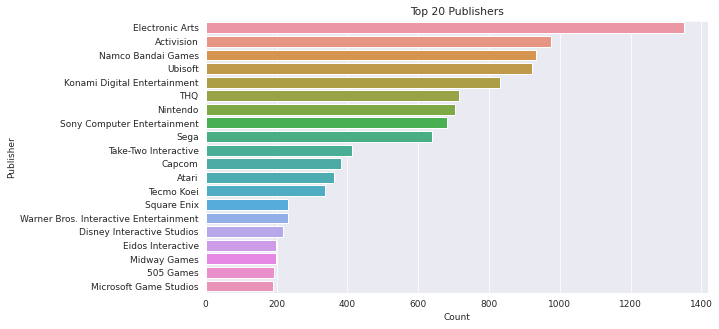

In [33]:
plt.title('Top 20 Publishers')
sns.barplot(x = pab, y = pab.index)
plt.xlabel('Count')
plt.ylabel('Publisher');

Electronic Arts leads the way, 

##### looking at it in terms of percentages.

In [34]:
pub = datadf.Publisher.value_counts()*100/datadf.Publisher.value_counts().sum()
pub.head(20)

Electronic Arts                           8.269572
Activision                                5.968048
Namco Bandai Games                        5.704842
Ubisoft                                   5.637510
Konami Digital Entertainment              5.092734
THQ                                       4.376569
Nintendo                                  4.303116
Sony Computer Entertainment               4.180694
Sega                                      3.911367
Take-Two Interactive                      2.528004
Capcom                                    2.332130
Atari                                     2.221950
Tecmo Koei                                2.068923
Square Enix                               1.426210
Warner Bros. Interactive Entertainment    1.420089
Disney Interactive Studios                1.334394
Eidos Interactive                         1.211973
Midway Games                              1.211973
505 Games                                 1.175246
Microsoft Game Studios         

### A little focus on our star publisher ( Electronic Arts)

In [35]:
EAdf = datadf[datadf.Publisher == 'Electronic Arts'].Platform.value_counts()
EAdf = EAdf.reset_index().rename(columns = {'index':'Platform','Platform':'Games'})
EAdf

,Platform,Games
0,PS2,199
1,X360,167
2,PC,148
3,PS3,142
4,XB,123
5,PS,106
6,GC,90
7,Wii,90
8,DS,79
9,PSP,72


In [36]:
raw = datadf [datadf.Publisher == 'Electronic Arts'].groupby('Platform').Global_Sales.sum().sort_values(ascending= False)
raw = raw.reset_index()
raw

,Platform,Global_Sales
0,PS2,255.79
1,X360,181.04
2,PS3,168.71
3,PS,90.46
4,PC,71.44
5,Wii,62.58
6,XB,58.33
7,PS4,55.32
8,PSP,39.02
9,DS,32.95


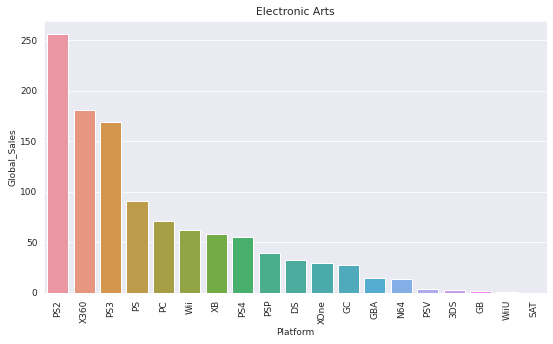

In [37]:
plt.title('Electronic Arts')
sns.barplot(x= raw.Platform ,y = raw.Global_Sales)
plt.xticks(rotation = 90);

In [38]:
mixdf= raw.merge(EAdf)
mixdf

,Platform,Global_Sales,Games
0,PS2,255.79,199
1,X360,181.04,167
2,PS3,168.71,142
3,PS,90.46,106
4,PC,71.44,148
5,Wii,62.58,90
6,XB,58.33,123
7,PS4,55.32,26
8,PSP,39.02,72
9,DS,32.95,79


In [39]:
mixdf['Ratio'] = (mixdf.Global_Sales/mixdf.Games)
mixdf

,Platform,Global_Sales,Games,Ratio
0,PS2,255.79,199,1.285377
1,X360,181.04,167,1.084072
2,PS3,168.71,142,1.188099
3,PS,90.46,106,0.853396
4,PC,71.44,148,0.482703
5,Wii,62.58,90,0.695333
6,XB,58.33,123,0.474228
7,PS4,55.32,26,2.127692
8,PSP,39.02,72,0.541944
9,DS,32.95,79,0.417089


First, i computed the number of games by **Electronic Arts** on the 12 distinct platforms. And then, i summed the **Global_Sales** for **Electronic Arts** on the various platforms. Merging the data in **Mixdf**. Also, i created another column **Ratio** to show sales/per game for each platform. The future for **Electronic Arts** is clearly the Ps4 console. Despite having just 26 games on it, it still managed to rake up 55.32(million) global sales, scoring the best sales to games ratio(each game raking in 2.13(million) sales on average.

## Year

In [40]:
no_relyearly = datadf.Year.value_counts().sort_index()
no_relyearly = no_relyearly.reset_index()
no_relyearly = no_relyearly.rename(columns = {'index':'Year', 'Year':'Games_released'})

In [41]:
no_relyearly

,Year,Games_released
0,1980.0,9
1,1981.0,46
2,1982.0,36
3,1983.0,17
4,1984.0,14
5,1985.0,14
6,1986.0,21
7,1987.0,16
8,1988.0,15
9,1989.0,17


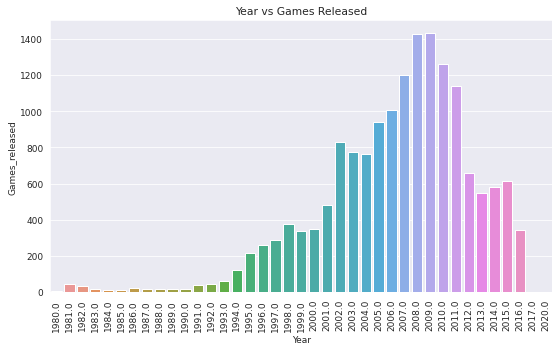

In [42]:
plt.xticks(rotation = 90)
plt.title('Year vs Games Released')
sns.barplot(x = no_relyearly.Year , y = no_relyearly.Games_released);

From the 1980s, there has generally been a steady rise in the number of games released. We see a tremendous rise from the late 90s and a peak in 2009. 

In [43]:
year_salesmean = datadf.groupby('Year').agg(['mean','sum'])

In [44]:
year_gsales= datadf.groupby('Year').sum()['Global_Sales']
year_gsales = year_gsales.reset_index()

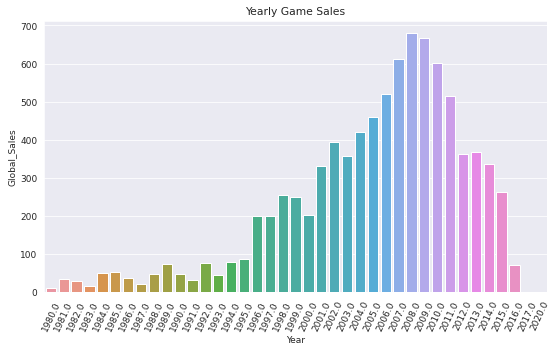

In [45]:
plt.title('Yearly Game Sales')
plt.xticks(rotation = 65)
sns.barplot(x = year_gsales.Year,y = year_gsales.Global_Sales, data = year_gsales);

In [46]:
game_sales = year_gsales.merge(no_relyearly)
game_sales 

,Year,Global_Sales,Games_released
0,1980.0,11.38,9
1,1981.0,35.77,46
2,1982.0,28.86,36
3,1983.0,16.79,17
4,1984.0,50.36,14
5,1985.0,53.94,14
6,1986.0,37.07,21
7,1987.0,21.74,16
8,1988.0,47.22,15
9,1989.0,73.45,17


The table above, shows the **Global_Sales** and the number of **Games_released** for each year till 2020. We see that **Global_sales** peaked at **678.90**(millions) in sales in **2008**, the same year that also marked the decline in the gaming industry in terms of **sales and games released**.

### Releationship between Global_sales and number of Games_released.

In [47]:
corr = (game_sales.Global_Sales.corr(game_sales.Games_released))
corr

0.9830296366114084

The value above is the correlation coefficient, indicating the strength and direction of the relationship between two variables. The coefficient for the two variables under consideration (**Global_sales and Games_released**) is approx. **0.98** indicating a near-perfect l, positive relationship. Which means, the higher the number of games, the higher the number of global_sales(yearly). 

## Year on year changes in Global_Sales.

In [48]:
def yronyr(x,columnname):
    yr = []
    for i in range(len(x)):
        if i == 0:
            yr.append(0)
        if i != int(len(x))-1:
            yr.append(x[i+1] - x[i])
    game_sales[columnname] = yr
    
    

The function **yronyr** creates a new column showing the difference between a value in a column and the previous value in the same column. 

In [49]:
yronyr(game_sales.Global_Sales,'yr_on_yr_Gsales')
yronyr(game_sales.Games_released,'yr_on_yr_Greleased')

In [50]:
game_sales

,Year,Global_Sales,Games_released,yr_on_yr_Gsales,yr_on_yr_Greleased
0,1980.0,11.38,9,0.00,0
1,1981.0,35.77,46,24.39,37
2,1982.0,28.86,36,-6.91,-10
3,1983.0,16.79,17,-12.07,-19
4,1984.0,50.36,14,33.57,-3
5,1985.0,53.94,14,3.58,0
6,1986.0,37.07,21,-16.87,7
7,1987.0,21.74,16,-15.33,-5
8,1988.0,47.22,15,25.48,-1
9,1989.0,73.45,17,26.23,2


<Figure size 1080x504 with 0 Axes>

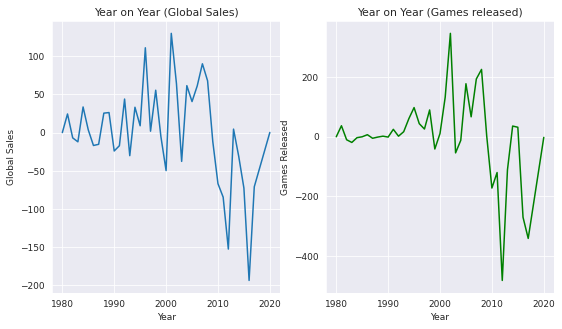

In [51]:
plt.figure(figsize = (15,7))
fig,(ax1,ax2) = plt.subplots(1,2)
ax1.plot( game_sales.Year,game_sales.yr_on_yr_Gsales)
ax1.set(title= ('Year on Year (Global Sales)'),xlabel=('Year'), ylabel=('Global Sales'))
ax2.plot(game_sales.Year,game_sales.yr_on_yr_Greleased,c='g')
ax2.set(title = 'Year on Year (Games released)',xlabel = 'Year',ylabel = 'Games Released');

The two line graphs follow the same pattern or trend and reinforces the positive correlation we established previously. There is constant fluctuation all through the trend with more positivity at the initial stage up until 2010 where there is a crash and constant decline.

In [ ]:
import jovian

Let us save and upload our work to Jovian before continuing

In [ ]:
jovian.commit()

## Asking and Answering Questions

Here i ask and try to answer questions using the information i can garner from the datset.



####  Q1: What console is the future?

In [52]:
future= datadf.groupby('Year')['Platform'].value_counts()
future = future[2012.0:]
future

Year    Platform
2012.0  PS3         148
        PSP         106
        X360        106
        3DS          93
        PC           61
        PSV          54
        Wii          32
        WiiU         32
        DS           25
2013.0  PS3         127
        3DS          91
        X360         75
        PSV          63
        PSP          54
        WiiU         42
        PC           38
        XOne         19
        PS4          16
        Wii          12
        DS            9
2014.0  PS3         108
        PSV         102
        3DS          79
        PS4          75
        X360         65
        XOne         61
        PC           44
        WiiU         31
        PSP          10
        Wii           6
        DS            1
2015.0  PS4         137
        PSV         113
        3DS          86
        XOne         79
        PS3          74
        PC           50
        X360         40
        WiiU         28
        Wii           4
        PSP           3

In [53]:
put = datadf.groupby(['Year','Platform']).sum()['Global_Sales']
put = put[2012.0:]
put = put.reset_index()
put

,Year,Platform,Global_Sales
0,2012.0,3DS,51.14
1,2012.0,DS,11.64
2,2012.0,PC,23.53
3,2012.0,PS3,109.49
4,2012.0,PSP,7.72
5,2012.0,PSV,18.53
6,2012.0,Wii,22.77
7,2012.0,WiiU,17.84
8,2012.0,X360,100.88
9,2013.0,3DS,55.88


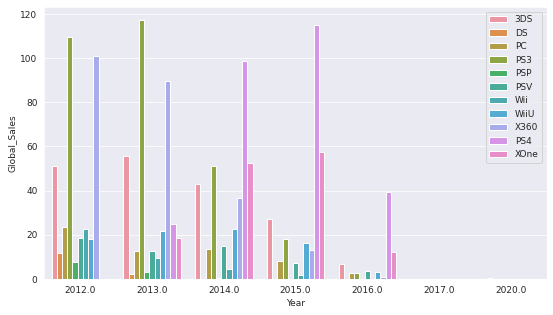

In [54]:
sns.barplot(x = put.Year , y = put.Global_Sales , hue = put.Platform,data = put)
plt.legend(loc = 'upper right');


To answer this question, i looked at the number of games for each console in the last 8years, but the focus is more on the last 5years. The ps4, psv and the xone consoles stand out in terms of the number of games created in the last five years but Looking at the barchart showing the trend of sales for the various _platforms_ for the last 8 years in the dataset, we see that the _ps4_ and _xone_ match it with high sales and are the dominant ones in recent times.

#### Q2: More games, but what genre is preferred?

This question has already been answered in the **Games Genre count vs Global sales.** section. But for more focus, the **platform,Shooter and Role_playing** genres are the most promising and would yield profit if more games are released in their genre. 

#### Q3: More sales, but what market should i focus on?

In [55]:
castdf = datadf.groupby('Genre').sum()[['NA_Sales','EU_Sales','JP_Sales','Other_Sales','Global_Sales']]

In [56]:
cols = castdf.columns
def percent(x,y):
    for each in y:
        x['Percent' + str(each)] = (x[str(each)]/x.Global_Sales)*100
         

The function creates a column for the percent of total sales for wach genre,for each location in the dataset.

In [57]:
percent(castdf,cols[0:4])
castdf

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,PercentNA_Sales,PercentEU_Sales,PercentJP_Sales,PercentOther_Sales
Genre,,,,,,,,,
Action,876.56,524.59,159.47,187.31,1748.97,50.118641,29.994225,9.117938,10.709732
Adventure,105.51,64.13,52.01,16.79,238.67,44.207483,26.869736,21.791595,7.034818
Fighting,221.76,100.17,87.32,36.24,445.45,49.783365,22.487372,19.602649,8.135593
Misc,407.75,215.32,106.69,75.06,805.45,50.623875,26.732882,13.246012,9.319014
Platform,446.93,201.14,130.65,51.59,830.63,53.806147,24.215355,15.729025,6.210948
Puzzle,123.04,50.70,56.68,12.48,243.44,50.542228,20.826487,23.282944,5.126520
Racing,358.12,237.49,56.63,76.99,729.48,49.092504,32.556067,7.763064,10.554093
Role-Playing,326.63,187.64,351.49,59.46,925.31,35.299521,20.278609,37.986188,6.425955
Shooter,581.62,312.96,38.23,102.58,1035.90,56.146346,30.211410,3.690511,9.902500


In [58]:
castdf[['PercentNA_Sales','PercentEU_Sales',"PercentJP_Sales",'PercentOther_Sales']]


,PercentNA_Sales,PercentEU_Sales,PercentJP_Sales,PercentOther_Sales
Genre,,,,
Action,50.118641,29.994225,9.117938,10.709732
Adventure,44.207483,26.869736,21.791595,7.034818
Fighting,49.783365,22.487372,19.602649,8.135593
Misc,50.623875,26.732882,13.246012,9.319014
Platform,53.806147,24.215355,15.729025,6.210948
Puzzle,50.542228,20.826487,23.282944,5.126520
Racing,49.092504,32.556067,7.763064,10.554093
Role-Playing,35.299521,20.278609,37.986188,6.425955
Shooter,56.146346,30.211410,3.690511,9.902500


North America is the biggest market for video game sales, holding the largest percent of global sales for each of all the genres and should be focused on for increased revenue. 

#### Q4: When in Japan, do as the Japanese do, or not?

In [10]:
gen = datadf.groupby('Genre')[['EU_Sales','NA_Sales','JP_Sales','Other_Sales']].sum().sort_values(by = 'NA_Sales', ascending = False)
gen

,EU_Sales,NA_Sales,JP_Sales,Other_Sales
Genre,,,,
Action,524.59,876.56,159.47,187.31
Sports,375.40,678.41,135.25,134.43
Shooter,312.96,581.62,38.23,102.58
Platform,201.14,446.93,130.65,51.59
Misc,215.32,407.75,106.69,75.06
Racing,237.49,358.12,56.63,76.99
Role-Playing,187.64,326.63,351.49,59.46
Fighting,100.17,221.76,87.32,36.24
Simulation,113.23,182.24,63.62,31.40


<AxesSubplot:title={'center':'North America'}, xlabel='NA_Sales', ylabel='Genre'>

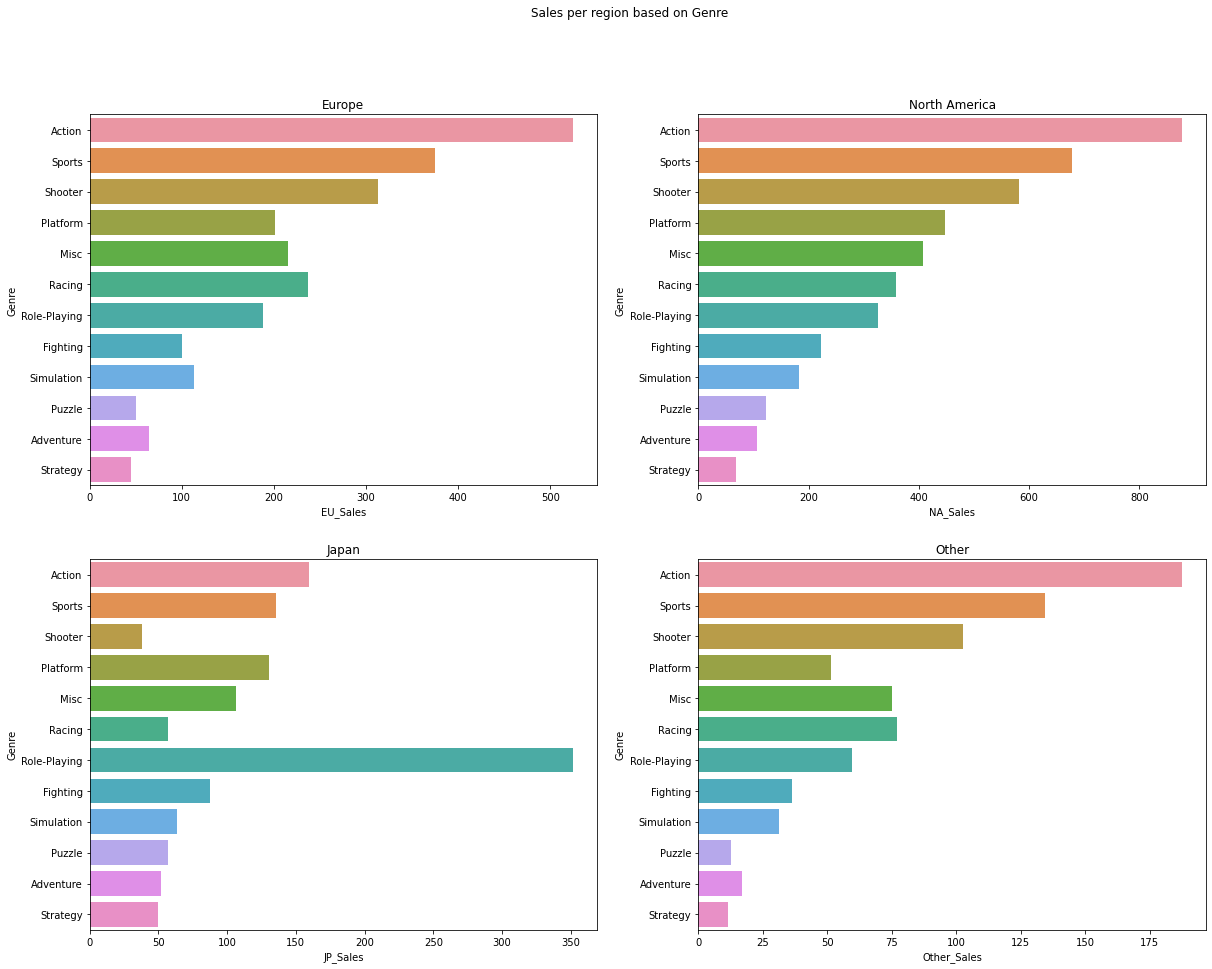

In [15]:
fig,ax = plt.subplots(2,2,figsize = (20,15))
fig.suptitle("Sales per region based on Genre")
sns.barplot(ax = ax[0][0] ,y= gen.index,x= gen.EU_Sales,data=gen)
ax[0][0].set(title = 'Europe' )
ax[1][0].set(title = 'Japan')
ax[1][1].set(title = 'Other')
ax[0][1].set(title = 'North America')
sns.barplot(ax = ax[1][0] , y = gen.index, x = gen.JP_Sales,data = gen)
sns.barplot(ax = ax[1][1] , y = gen.index , x = gen.Other_Sales, data = gen)
sns.barplot(ax = ax[0][1], y = gen.index, x = gen.NA_Sales ,data = gen)

This reaffirms our inference that __North America__ is the biggest market for video game sales, but the point i want to highlight, is the dominance of the __Role Playing__ genre in Japan. So if you're to sell a game in __Japan__, just make sure it's of the __Role Playing__ genre and you won't have to worry about profit.

Let us save and upload our work to Jovian before continuing.

In [16]:
import jovian

In [17]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "joshuaiwuoha611/videogames-a-story" on https://jovian.ai/
[jovian] Committed successfully! https://jovian.ai/joshuaiwuoha611/videogames-a-story


'https://jovian.ai/joshuaiwuoha611/videogames-a-story'

## Inferences and Conclusion

Based on questions I have asked we can make some inferences.
* The focus should be on the market in North America.
* The **Platform**, **Shooter**, and **Role_playing** genres are the most viable option going into the future.
* The ps4 and xone are the consoles taking over the market now. 
* There is a near_perfect positive relationship between Global_sales and the number of games released.
* Electronic Arts should focus on the Ps4 console.



In [ ]:
import jovian

In [ ]:
jovian.commit()

## References and Future Work

Going forward, I'd love to work with an updated version of this dataset to see new patterns and confirm if inferences drawn from .

In [59]:
import jovian

In [ ]:
jovian.commit()